In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
import random as rd

In [2]:
np.random.seed(1)

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return dot_T_Y.sum()

In [5]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [6]:
def derivative_w2(Z, T, Y):
    return Z.T.dot(T - Y)

In [7]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

In [8]:
def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    return ret2

In [9]:
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

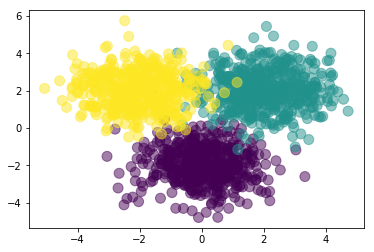

In [10]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

FULL BATCH

cost: -3147.180844402328 classification_rate: 0.26866666666666666
cost: -141.97075097237763 classification_rate: 0.9673333333333334
cost: -123.26725832918534 classification_rate: 0.9686666666666667
cost: -118.83941596682908 classification_rate: 0.9686666666666667
cost: -116.9091029167447 classification_rate: 0.9686666666666667
cost: -115.79062755420198 classification_rate: 0.9693333333333334
cost: -115.03007049303264 classification_rate: 0.9693333333333334
cost: -114.45935430430393 classification_rate: 0.97
cost: -114.00283541809502 classification_rate: 0.97
cost: -113.62188120407879 classification_rate: 0.97
Elapsted time for full: 0:00:00.297060


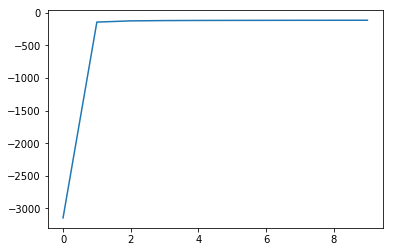

In [11]:
# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

t0 = datetime.now()

learning_rate = 1e-3
costs_full = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_full.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

print("Elapsted time for full:", datetime.now() - t0)    
    
plt.plot(costs_full)
plt.show()

BATCH

('cost:', -2768.6483384897583, 'classification_rate:', 0.3333333333333333)
('cost:', -165.06440160894903, 'classification_rate:', 0.9713333333333334)
('cost:', -139.1107294791183, 'classification_rate:', 0.9726666666666667)
('cost:', -130.952029970505, 'classification_rate:', 0.972)
('cost:', -126.2362168625667, 'classification_rate:', 0.9713333333333334)
('cost:', -122.73958028847113, 'classification_rate:', 0.972)
('cost:', -120.03029196004248, 'classification_rate:', 0.972)
('cost:', -118.0394020839175, 'classification_rate:', 0.9713333333333334)
('cost:', -116.6435825709974, 'classification_rate:', 0.9713333333333334)
('cost:', -115.66134116803703, 'classification_rate:', 0.9706666666666667)
('Elapsted time for batch:', datetime.timedelta(0, 1, 98000))


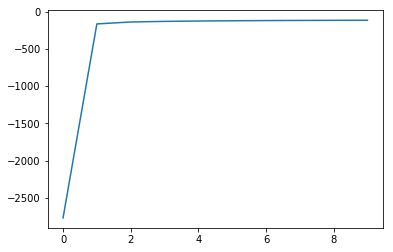

In [149]:
costs_batch = []
learning_rate = 1e-3
reg = 0.01
batch_sz = 100
n_batches = N // batch_sz


# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

t0 = datetime.now()

for epoch in range(1000):
    tmpX, tmpT, tmpY = shuffle(X, T, Y)
    for j in range(n_batches):
        x = tmpX[j*batch_sz:(j*batch_sz + batch_sz),:]
        t = tmpT[j*batch_sz:(j*batch_sz + batch_sz),:]
                        
        output, hidden = forward(x, W1, b1, W2, b2)
        
        W2 += learning_rate * derivative_w2(hidden, t, output)
        b2 += learning_rate * derivative_b2(t, output)
        W1 += learning_rate * derivative_w1(x, hidden, t, output, W2)
        b1 += learning_rate * derivative_b1(t, output, W2, hidden)
            
    if epoch % 100 == 0:
        output, hidden = forward(tmpX, W1, b1, W2, b2)
        c = cost(tmpT, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(tmpY, P)
        print("cost:", c, "classification_rate:", r)
        costs_batch.append(c)

print("Elapsted time for batch:", datetime.now() - t0)           
        
plt.plot(costs_batch)
plt.show()

SGD

('cost:', -831.7688755075869, 'classification_rate:', 0.908)
('cost:', -142.44972084084543, 'classification_rate:', 0.9686666666666667)
('cost:', -125.68087243100143, 'classification_rate:', 0.97)
('cost:', -120.66095704839387, 'classification_rate:', 0.9693333333333334)
('cost:', -118.29686834167721, 'classification_rate:', 0.9693333333333334)
('cost:', -116.8816611878565, 'classification_rate:', 0.9693333333333334)
('cost:', -115.90851133039297, 'classification_rate:', 0.9693333333333334)
('cost:', -115.17687640299468, 'classification_rate:', 0.9693333333333334)
('cost:', -114.59520673019418, 'classification_rate:', 0.97)
('cost:', -114.11825300798665, 'classification_rate:', 0.9706666666666667)
('Elapsted time for stochastic:', datetime.timedelta(0, 62, 581000))


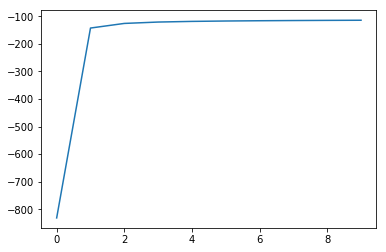

In [150]:
costs_stochastic = []
learning_rate = 1e-3

# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

t0 = datetime.now()


for epoch in range(1000):
    tmpX, tmpT, tmpY = shuffle(X, T, Y)
    for n in range(N): 
        x = tmpX[n,:].reshape(1,D) #1 row, 2 columns, i.e. 1X2 matrix.  note that X is N X D matrix
        t = tmpT[n,:].reshape(1,M)
                
        output, hidden = forward(x, W1, b1, W2, b2)
        
        W2 += learning_rate * derivative_w2(hidden, t, output)
        b2 += learning_rate * derivative_b2(t, output)
        W1 += learning_rate * derivative_w1(x, hidden, t, output, W2)
        b1 += learning_rate * derivative_b1(t, output, W2, hidden)
        
                
    if epoch % 100 == 0:
        output, hidden = forward(tmpX, W1, b1, W2, b2)
        c = cost(tmpT, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(tmpY, P)
        print("cost:", c, "classification_rate:", r)
        costs_stochastic.append(c)

print("Elapsted time for stochastic:",datetime.now() - t0)           
        
plt.plot(costs_stochastic)
plt.show()

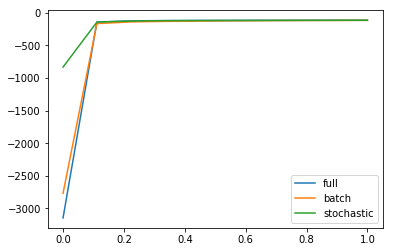

In [151]:
x1 = np.linspace(0, 1, len(costs_full))
plt.plot(x1, costs_full, label="full")
x2 = np.linspace(0, 1, len(costs_batch))
plt.plot(x2, costs_batch, label="batch")
x3 = np.linspace(0, 1, len(costs_stochastic))
plt.plot(x3, costs_stochastic, label="stochastic")
plt.legend()
plt.show()